In [37]:
# https://www.kaggle.com/arshid/iris-flower-dataset
# https://www.kaggle.com/mastmustu/basic-of-decision-tree
# https://www.kaggle.com/midouazerty/iris-data-with-98-accuracy-score

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read the data 
df = pd.read_csv('IRIS.csv')

In [4]:
# Separating features and defining labels/target 

X = df.drop(['species'], axis=1)  #  X will contain all features
Y = df['species'] # y will be labels

print(X.shape) #dimensions of input data
print(Y.shape) #dimensions of output data


# is this binary classification or not  ?

(150, 4)
(150,)


In [5]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 0.5, random_state = 0) 
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(75, 4)
(75, 4)
(75,)
(75,)


### Decision Tree Classifier 

In [6]:
# Decision Tree Classifier 
from sklearn.tree import DecisionTreeClassifier  
# By using information gain 
classifierDT = DecisionTreeClassifier(criterion='gini')  
classifierDT.fit(X_train, Y_train) 

# Check Criteria  ?
print(classifierDT)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [7]:
# By using information entropy 
classifierDT2 = DecisionTreeClassifier(criterion='entropy')  
classifierDT2.fit(X_train, Y_train)
print(classifierDT2)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [9]:
# predicting by using both classifierDT and classifierDT2 classifiers 



Y_pred_DT1 = classifierDT.predict(X_test)  
print(Y_pred_DT1)

Y_pred_DT2 = classifierDT2.predict(X_test)  
print(Y_pred_DT2)

['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-

In [12]:
# Accuracy

from sklearn.metrics import accuracy_score 
acc_DT1 = accuracy_score(Y_test,Y_pred_DT1)
print("Accuracy by using Information Gain model {} %".format(acc_DT1*100))


acc_DT2 = accuracy_score(Y_test,Y_pred_DT1)
print("Accuracy by using Entropy model {} %".format(acc_DT1*100))

Accuracy by using Information Gain model 96.0 %
Accuracy by using Entropy model 96.0 %


In [13]:
# confusion matrix for Information Gain Model 


from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(Y_test, Y_pred_DT1))
print(classification_report(Y_test, Y_pred_DT1)) 

[[21  0  0]
 [ 0 29  1]
 [ 0  2 22]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        21
Iris-versicolor       0.94      0.97      0.95        30
 Iris-virginica       0.96      0.92      0.94        24

       accuracy                           0.96        75
      macro avg       0.96      0.96      0.96        75
   weighted avg       0.96      0.96      0.96        75



In [14]:
# important features 

print(classifierDT.feature_importances_)

#SepalLenCm   SepalWidCm    PetalLenCm     PetalWidCm

[0.         0.02696872 0.92644896 0.04658233]


In [15]:
# important features 

print(classifierDT2.feature_importances_)

#SepalLenCm   SepalWidCm    PetalLenCm     PetalWidCm

[0.         0.02341995 0.91780212 0.05877794]


## sepal length and sepal width are not good features to classify iris flowers, however petal length and petal width are better 

This is what we conculded in Exporatory Data Analysis As well

### KNeighborsClassifier

In [27]:
from sklearn.neighbors import KNeighborsClassifier


classifierKN = KNeighborsClassifier(n_neighbors= 5)  
classifierKN.fit(X_train, Y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [28]:
y_predKN_3 = classifierKN.predict(X_test)  
print(y_predKN_3)

['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-

In [29]:
acc_3 = accuracy_score(Y_test,y_predKN_3)
print("Accuracy for Entropy model {} %".format(acc_3*100))

from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(Y_test, y_predKN_3))
print(classification_report(Y_test, y_predKN_3)) 

Accuracy for Entropy model 96.0 %
[[21  0  0]
 [ 0 29  1]
 [ 0  2 22]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        21
Iris-versicolor       0.94      0.97      0.95        30
 Iris-virginica       0.96      0.92      0.94        24

       accuracy                           0.96        75
      macro avg       0.96      0.96      0.96        75
   weighted avg       0.96      0.96      0.96        75



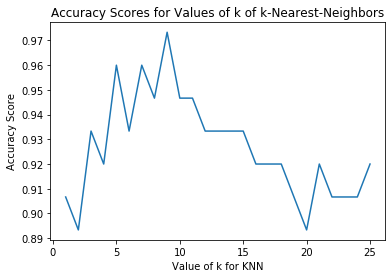

In [22]:
# How to choose K 
from sklearn import metrics
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(Y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

### XGBoost classifier

In [33]:
# conda install py-xgboost

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Ahmed\ana

  added / updated specs:
    - py-xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0          12 KB
    conda-4.10.1               |   py37haa95532_1         2.9 MB
    libxgboost-1.3.3           |       hd77b12b_0         1.3 MB
    py-xgboost-1.3.3           |   py37haa95532_0         138 KB
    ------------------------------------------------------------
                                           Total:         4.3 MB

The following NEW packages will be INSTALLED:

  _py-xgboost-mutex  pkgs/main/win-64::_py-xgboost-mutex-2.0-cpu_0
  libxgboost         pkgs/main/win-64::libxgboost-1.3.3-hd77b12b_0
  py-xgboost         pkgs/main/win-64::py-xgboost-1.3.3-py37haa95532_0

The following packages will be UPDATED:

  conda               

In [35]:
import xgboost as xgb

xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train, Y_train)

print('The accuracy of the xgb classifier is {:.2f} out of 1 on training data'.format(xgb_classifier.score(X_train, Y_train)))
print('The accuracy of the xgb classifier is {:.2f} out of 1 on test data'.format(xgb_classifier.score(X_test, Y_test)))

C:\Users\Ahmed\ana\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:46:25] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The accuracy of the xgb classifier is 1.00 out of 1 on training data
The accuracy of the xgb classifier is 0.93 out of 1 on test data
